In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/1. Weather Data.csv')

In [5]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


1: Data Overview and Cleaning

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
 8   month             8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 617.8+ KB


The data set provides various weather parameters and the respective dates/times these parameters were measured. The measured parameters include temperature, humidity, wind speed, visibility and pressure.
The total nmber of entries in the data set are 8784 entries of data types integers floats and objects.

In [45]:
check_duplicates = df.duplicated().any()
check_duplicates

False

There are no duplicates in the Data set

2:  Statistical Summary

In [6]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [7]:
df.columns


Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

3:Data Visualization

In [47]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['month'] = df['Date/Time'].dt.month_name()
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,January
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,January
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",January
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",January
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,January


In [31]:
Visual_1 = df.groupby('month').agg({

    'Temp_C':'mean',
    'Visibility_km':'mean',
    'Dew Point Temp_C':'mean',
    'Wind Speed_km/h':'mean',
    'Press_kPa':'mean'
})
Visual_1

,Temp_C,Visibility_km,Dew Point Temp_C,Wind Speed_km/h,Press_kPa
month,,,,,
April,7.009306,31.777083,-1.934583,17.369444,100.716833
August,22.279301,30.192608,15.644758,13.931452,100.927097
December,-3.306317,19.733199,-6.129032,17.614247,101.174409
February,-4.225000,25.182184,-9.221695,14.837644,101.142414
January,-7.371505,22.100269,-12.294758,18.108871,101.005349
July,22.790054,33.655108,14.595430,11.887097,100.828333
June,20.134028,32.104167,11.738056,14.681944,100.784222
March,3.121237,26.177957,-3.488575,14.514785,101.335255
May,16.237769,29.418548,8.080780,12.846774,101.057164


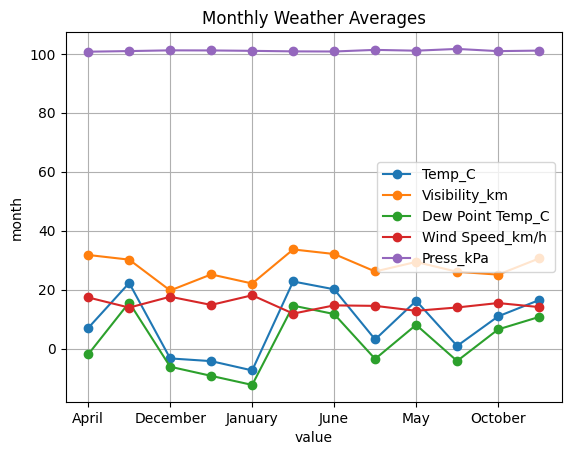

In [32]:
Visual_1.plot(kind = 'line',marker ='o' )
plt.title('Monthly Weather Averages')
plt.xlabel('value')
plt.ylabel('month')
plt.grid()
plt.show()

Major weather Observations: The Variation of pressure throughout the entire year was low. Normal temperatures(Temp_c) where slightly higher than dew point temperatures, however both had almost similar rates of change.Both of these temperatures had the  lowest avarages in January.

Correlation Matrices and Heat Maps

In [34]:
df_numeric = df.select_dtypes(include=[float, int])
df_numeric_corr = df_numeric.corr()
df_numeric_corr

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


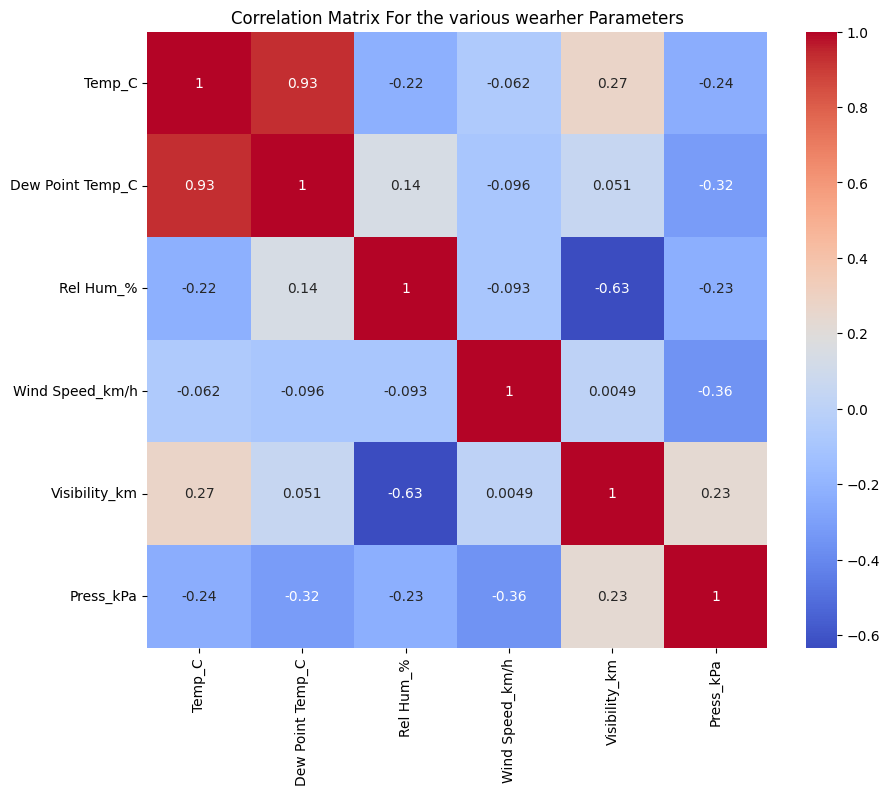

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix For the various wearher Parameters')
plt.show()

Observations;
 Temperature(temp_c) has the highest positive correlation with dew point temperature at 0.93.
 Wind speed has a slightly positive correlation with visibility and a slightly negative correlation with the rest of th weather parameters.








4 : Weather Patterns and Trends

In [40]:
visual_2 = df.groupby('month').agg({
    'Temp_C':'mean',
    'Rel Hum_%':'mean'
})


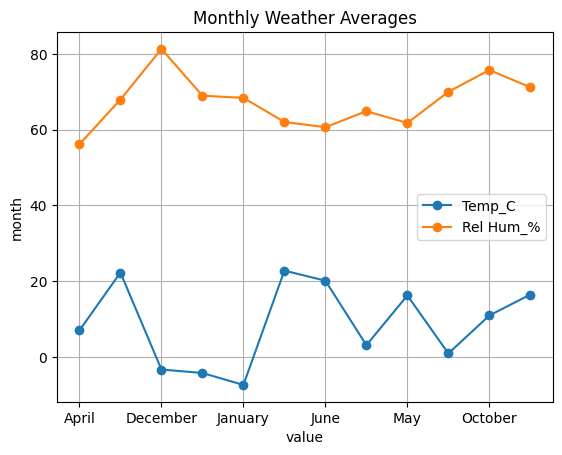

In [39]:
visual_2.plot(kind = 'line',marker ='o' )
plt.title('Monthly Weather Averages')
plt.xlabel('value')
plt.ylabel('month')
plt.grid()
plt.show()

In [41]:
visual_3 = df.groupby('month').agg({
    'Press_kPa':'mean',
    'Wind Speed_km/h':'mean'
})

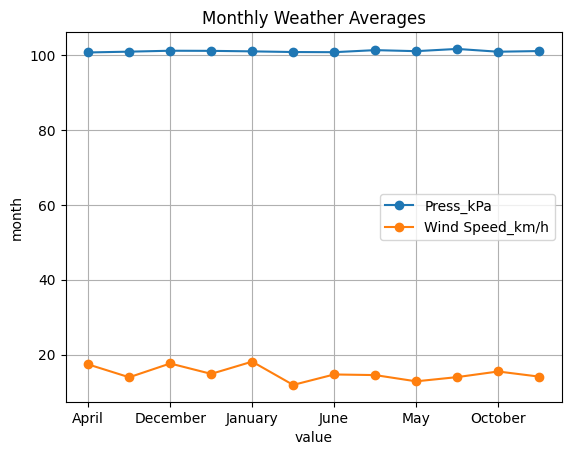

In [42]:
visual_3.plot(kind = 'line',marker ='o' )
plt.title('Monthly Weather Averages')
plt.xlabel('value')
plt.ylabel('month')
plt.grid()
plt.show()

5: **Insights and conclusion**. Low temperatures and low dew point temperatures are associated with fog, limited visibility and snow(Months of January, FWebruary, March , Novemebr and December.
Temperature and relative humidity have a non linear relationship with increase in temperatures causing considerable reduction in relative himidity.
Wind Speeds reduce wih increase in temperature.

**Application** This insights are essential in determining means of transport in the case of limited visibility and snow in the case of January, February and December during low teperature and low dew point tempratures.

6:**Recommendations for further Analysis.**. The relationship between **"Temp_c"** and "**Visibility_km"**. The two have a positive coeffiient of** 0.27**